<a href="https://colab.research.google.com/github/MohamedAchraf/CNN_with_KERAS/blob/main/Cifar_10/cifar10_ALL_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>

<div style="direction:rtl">
<font size=6><B><center>
    تصنيف متعدد الفئات باستخدام التعلم العميق
</font>
</div>

<hr>

<div style="direction:rtl">
<font size=5><B><center>
تحميل المكتبات
</font>
</div>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
from keras.utils.vis_utils import plot_model
from google.colab import drive
from keras.models import load_model

In [2]:
plt.style.use('ggplot')

<div style="direction:rtl">
<font size=5><B><center>
    البيانات : cifar10
</font>
</div>

<hr>

<div style="direction:rtl"> <font size=3>
تتكون مجموعة بيانات CIFAR-10 من 60000 صورة ملونة بحجم 32 × 32 مقسومة إلى 10 فئات ، مع 6000 صورة لكل فئة.<br><br>
يوجد 50000 صورة تدريب و 10000 صورة اختبار.
</font>
</div>

[Know Your Data : CIFAR-10](https://knowyourdata-tfds.withgoogle.com/#tab=STATS&dataset=cifar10)


<hr>

<div style="direction:rtl">
<font size=5><B><center>
    تحميل البيانات وتقسيمها إلى مجموعة تدريب ومجموعة اختبار
</font>
</div>

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


<hr>

<div style="direction:rtl">
<font size=5><B><center>
تحديد أسماء الفئات
    </font>
</div>

In [4]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

<hr>

<div style="direction:rtl">
<font size=5><B><center>
عرض شكل البيانات
    </font>
</div>

In [5]:
print("- شكل بيانات التدريب:")
print("\tX  : ",x_train.shape)
print("\tY  : ",y_train.shape)
print("\n- شكل بيانات الاختبار:")
print("\tX  : ",x_test.shape)
print("\tY  : ",y_test.shape)

- شكل بيانات التدريب:
	X  :  (50000, 32, 32, 3)
	Y  :  (50000, 1)

- شكل بيانات الاختبار:
	X  :  (10000, 32, 32, 3)
	Y  :  (10000, 1)


<hr>

<hr>

<div style="direction:rtl">
<font size=5><B><center>
عرض بعض الصور العشوائية من مجموعة البيانات
    </font>
</div>

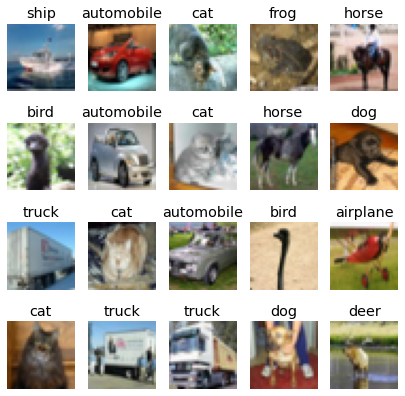

In [28]:
fig = plt.figure(figsize = (10, 10))

sample = random.sample(range(1, 100), 20)

for i in range(20):
    fig.add_subplot(4, 5, i+1)
    plt.axis('off')  
    plt.imshow(x_train[sample[i]])
    plt.title(cifar_classes[int(y_train[sample[i]])])

plt.show()


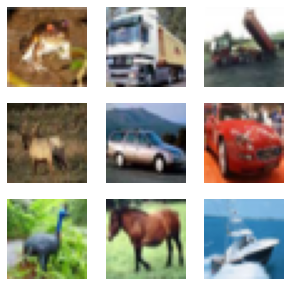

In [22]:
# showing figures
fig = plt.figure(figsize = (5, 5))
for i in range(9):
  fig.add_subplot(3, 3, i+1)
  plt.axis('off')  
  plt.imshow(x_train[i])

plt.show()

<hr>

<div style="direction:rtl">
<font size=5><B><center>
تطبيع البيانات
    </font>
</div>

<div style="direction:rtl">
<font size=3>
  <br>  حتى نتمكن من فهم الجدوى من تطبيع البيانات فلننطلق من مثال:<br>
لنفرض أن لدينا مجموعة بيانات تصف المنازل.<br>
   لكل منزل ميزتان محتملتان هما عدد الغرف، وعمر المنزل بالسنوات. <br>
لنفرض أننا أردنا استعمال التعلم الآلي للتنبؤ بالمنزل الأفضل. ستقوم الخوارزمية بمقارنة نقاط البيانات، سنلاحظ أن ميزة عمر المنازل لديها نطاق أكبر.
<br>عمر المنازل ما بين 0 و100
<br>عدد الغرف ما بين 0 و 20
<br>
    ما سينتج عن هذا أنه، أثناء عملية التعلم، سوف تهيمن ميزة عمر المنزل تمامًا على ميزة عدد الغرف.
<br>
    </font>
</div>

<div style="direction:rtl">
<font size=3>
لتجنب هذا الموقف ، سنقوم بتطبيق تطبيع البيانات.
<br>
المبدأ هو أنه بالنسبة لكل ميزة ، يتم تحويل الحد الأدنى لقيمة هذه الميزة إلى 0 ، ويتم تحويل القيمة القصوى إلى 1 ، ويتم تحويل كل قيمة أخرى إلى رقم عشري بين 0 و 1.
<br>
على سبيل المثال ، نعتبر أن لدينا هذه المجموعة من الأرقام
<br>
{20 ، 30 ، 40}
<br>
الحد الأدنى لهذه المجموعة هو 20 سيتم تحويله إلى 0
<br>
الحد الأقصى لهذه المجموعة هو 40 سيتم تحويله إلى 1
<br>
و 30 سيتحول إلى حوالي 0.5 لأنه يقع في منتصف الطريق بين 20 و 40.
<br>
    </font>
</div>

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

<hr>

<div style="direction:rtl">
<font size=6><B><center>
الشبكة العصبية
</font>
</div>

<hr>

<div style="direction:rtl">
<font size=5><B><center>
 النموذج
</font>
</div>

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding ='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3, 3), padding ='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3, 3), padding ='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.2),
   
    tf.keras.layers.Conv2D(256, (3, 3), padding ='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(256, (3, 3), padding ='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(512, (3, 3), padding ='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(512, (3, 3), padding ='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),


    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
     
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(
    optimizer=Adam(lr=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

#print(model.summary())

In [ ]:
# Train the model
history = model.fit(x_train, y_train, batch_size=5000, shuffle=True, epochs=200, verbose=1)

Epoch 1/200
10/10 [==============================] - 52s 437ms/step - loss: 2.3025 - accuracy: 0.1018
Epoch 2/200
10/10 [==============================] - 4s 438ms/step - loss: 2.2806 - accuracy: 0.1281
Epoch 3/200
10/10 [==============================] - 4s 437ms/step - loss: 2.2324 - accuracy: 0.1504
Epoch 4/200
10/10 [==============================] - 4s 439ms/step - loss: 2.1906 - accuracy: 0.1603
Epoch 5/200
10/10 [==============================] - 4s 438ms/step - loss: 2.1462 - accuracy: 0.1656
Epoch 6/200
10/10 [==============================] - 4s 439ms/step - loss: 2.0954 - accuracy: 0.1737
Epoch 7/200
10/10 [==============================] - 4s 439ms/step - loss: 2.0634 - accuracy: 0.1814
Epoch 8/200
10/10 [==============================] - 4s 441ms/step - loss: 2.0241 - accuracy: 0.1847
Epoch 9/200
10/10 [==============================] - 4s 442ms/step - loss: 2.0248 - accuracy: 0.1855
Epoch 10/200
10/10 [==============================] - 4s 443ms/step - loss: 1.9663 - accur

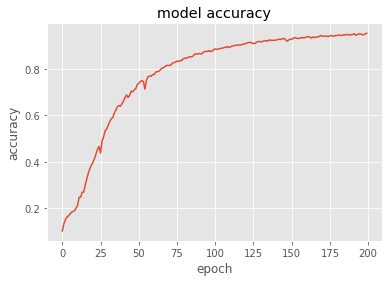

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.rcParams["figure.figsize"] = (17,7)
plt.show()

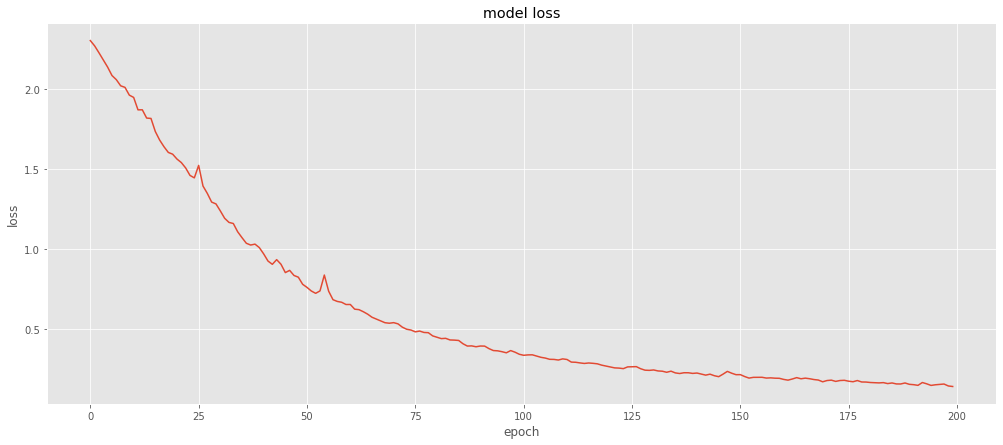

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.rcParams["figure.figsize"] = (17,7)
plt.show()

In [ ]:
# Evaluate model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.9836 - accuracy: 0.7796
0.9835510849952698 0.7796000242233276


In [ ]:
# Saving model
drive.mount('/content/drive')

MODEL_PATH = './drive/My Drive/Colab Notebooks/models/cifar_10_model_02_GPU.h5'

# Now save model in drive
model.save(MODEL_PATH)

Mounted at /content/drive


In [ ]:
# Loading model
loaded_model = load_model(MODEL_PATH)

# Show the model architecture
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         1

In [ ]:
# Evaluate Loaded model
val_loss, val_acc = loaded_model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.9836 - accuracy: 0.7796
0.9835510849952698 0.7796000242233276


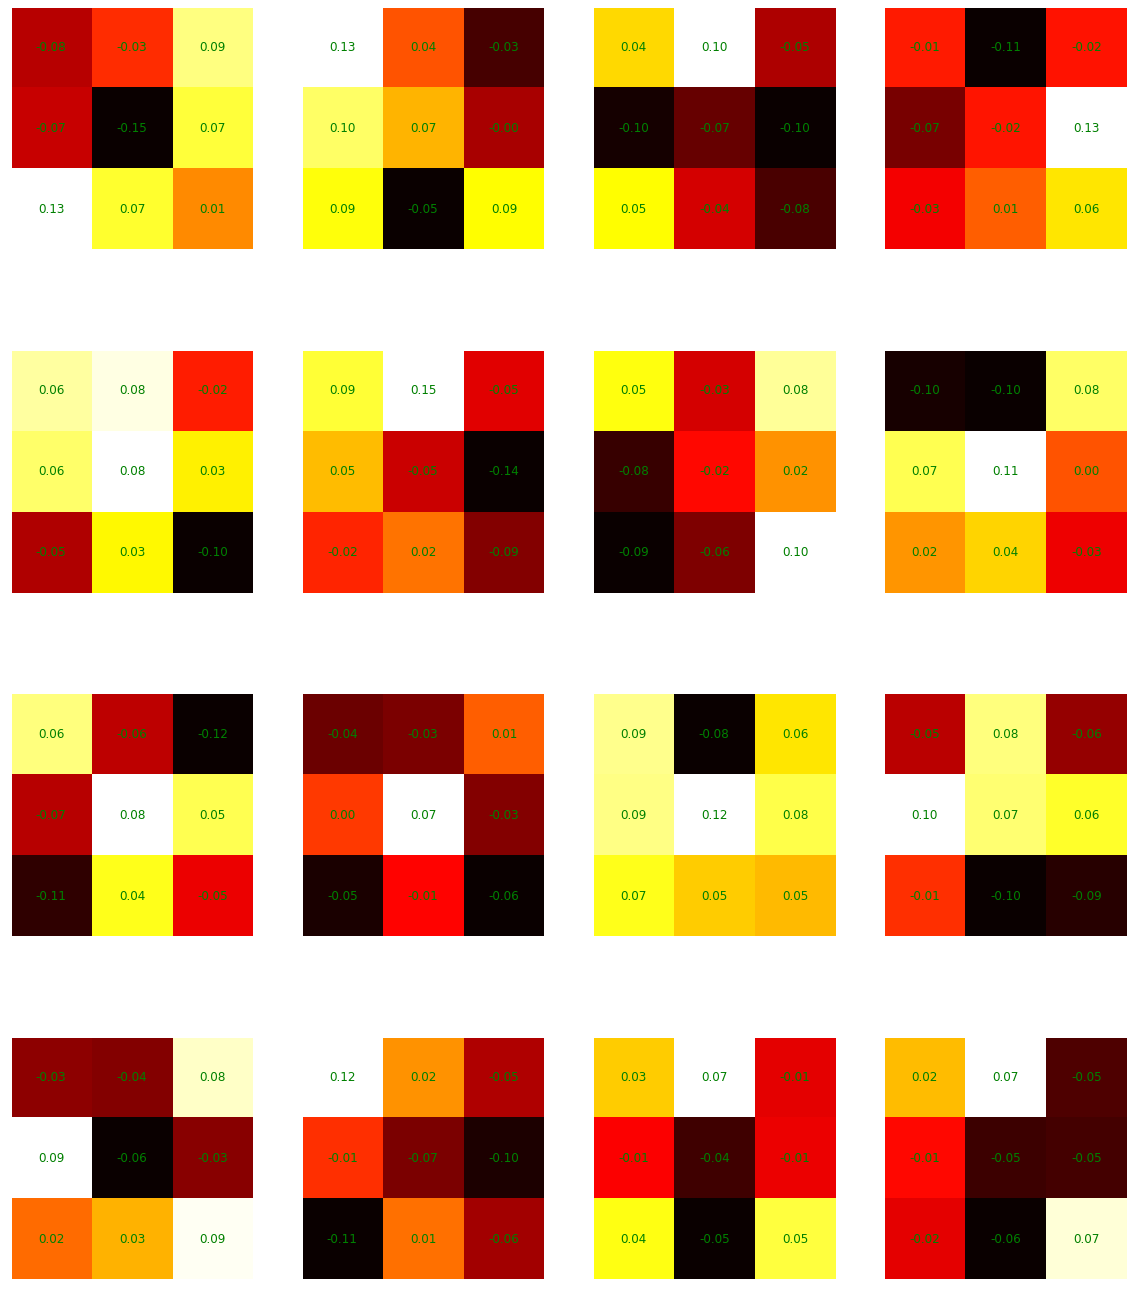

In [ ]:
# retrieve weights from the first hidden layer
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
#f_min, f_max = filters.min(), filters.max()
#filters = (filters - f_min) / (f_max - f_min)
# plot filters
n_filters, ix = 16, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(1):
        # specify subplot and turn of axis
        (ax) = plt.subplot(n_filters, 4, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.figure.set_size_inches(20, 100)
        # plot filter channel in hot
        c= plt.imshow(f[:, :, j], cmap='hot')
        #plt.colorbar(c)
        ix += 1
        # Loop over data dimensions and create text annotations.
        for k in range(3):
                for l in range(3):
                        val = "{:.2f}".format(f[:, :, j][l][k])
                        text = ax.text(k, l, val, ha="center", va="center", color="g", fontsize=12)

# show the figure  
plt.show()